In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
charts = pd.read_csv('2019_top_100.csv')

In [4]:
charts

,artist,song,label,position,start_date,end_date
0,Capital Bra,Benzema,Universal Domestic Urban,1,28.12.2018,03.01.2019
1,Mariah Carey,All I Want For Christmas Is You,SME - Columbia,2,28.12.2018,03.01.2019
2,Wham!,Last Christmas,SME - Epic,3,28.12.2018,03.01.2019
3,Ava Max,Sweet But Psycho,Atlantic,4,28.12.2018,03.01.2019
4,Chris Rea,Driving Home For Christmas,Warner Music International,5,28.12.2018,03.01.2019
...,...,...,...,...,...,...
5295,Michael Bublé,Santa Claus Is Coming To Town,Reprise,96,27.12.2019,02.01.2020
5296,Apache 207,Sex mit dir,SME - Two Sides,97,27.12.2019,02.01.2020
5297,"The Cratez, Luciano & Kontra K",Himmel grau,SME - RBK,98,27.12.2019,02.01.2020
5298,The Kingdom Choir feat. Camélia Jordana & Namika,Holidays Are Coming,SME - Sony Music,99,27.12.2019,02.01.2020


In [5]:
charts['start_date']= pd.to_datetime(charts['start_date'], format='%d.%m.%Y')
charts['end_date']= pd.to_datetime(charts['end_date'], format='%d.%m.%Y')

In [6]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   artist      5300 non-null   object        
 1   song        5300 non-null   object        
 2   label       5297 non-null   object        
 3   position    5300 non-null   int64         
 4   start_date  5300 non-null   datetime64[ns]
 5   end_date    5300 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 248.6+ KB


In [7]:
import datetime as dt

In [8]:
charts['week'] = charts['start_date'].dt.week

In [12]:
tracks = charts.song.unique()

peak_positions = charts.groupby(['song'])['position'].min()

for track in tracks:
    charts.loc[charts['song'] == track, 'peak'] = peak_positions[track]

In [13]:
charts.head()

,artist,song,label,position,start_date,end_date,week,peak
0,Capital Bra,Benzema,Universal Domestic Urban,1,2018-12-28,2019-01-03,52,1.0
1,Mariah Carey,All I Want For Christmas Is You,SME - Columbia,2,2018-12-28,2019-01-03,52,1.0
2,Wham!,Last Christmas,SME - Epic,3,2018-12-28,2019-01-03,52,2.0
3,Ava Max,Sweet But Psycho,Atlantic,4,2018-12-28,2019-01-03,52,1.0
4,Chris Rea,Driving Home For Christmas,Warner Music International,5,2018-12-28,2019-01-03,52,5.0


In [14]:
charts.columns

Index(['artist', 'song', 'label', 'position', 'start_date', 'end_date', 'week',
       'peak'],
      dtype='object')

In [15]:
counts = charts['artist'].value_counts().rename_axis('artist').reset_index(name='counts')
counts

,artist,counts
0,Apache 207,125
1,Capital Bra,119
2,Mero,93
3,Shindy,81
4,Billie Eilish,79
...,...,...
514,Jason Derulo x David Guetta feat. Nicki Minaj ...,1
515,K-Fly & MCN,1
516,Luis Fonsi feat. Daddy Yankee,1
517,Boney M.,1


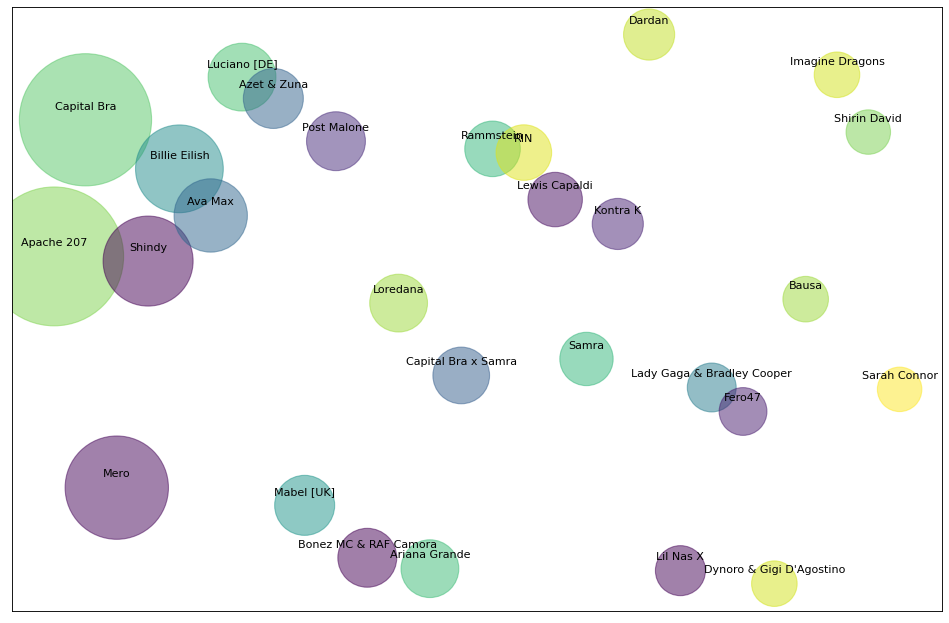

In [98]:
plt.figure(figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

top_artists = counts[counts['counts'] >= 40]

x = top_artists['artist']
y = np.random.rand(len(x))
#y_shuffled = np.random.shuffle(y)
colors = np.random.rand(len(x))
plt.scatter(x, y,
         marker='o', s=top_artists['counts']**2, alpha=.5, c=colors)

for i,j in zip(x,y):
    label = i
    
    # this method is called for each point
    plt.annotate(label, # this is the text
                 (i,j), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xticks([], [])
plt.yticks([], [])

plt.show()

In [17]:
def info_artist(artist_name):
    df = charts[charts['artist'] == artist_name].sort_values(by='start_date').copy()
    tracks = df.song.unique()
    plt.figure(figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

    for track in tracks:
        x = df[df['song'] == track]['start_date']
        y = df[df['song'] == track]['position']
        plt.scatter(x, y,
                 marker='o', s=1000-y*10, alpha=.5,
                 label=track)

    plt.yticks(np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))

    plt.legend(numpoints=1)

    ax = plt.gca()
    ax.invert_yaxis()

    plt.show()

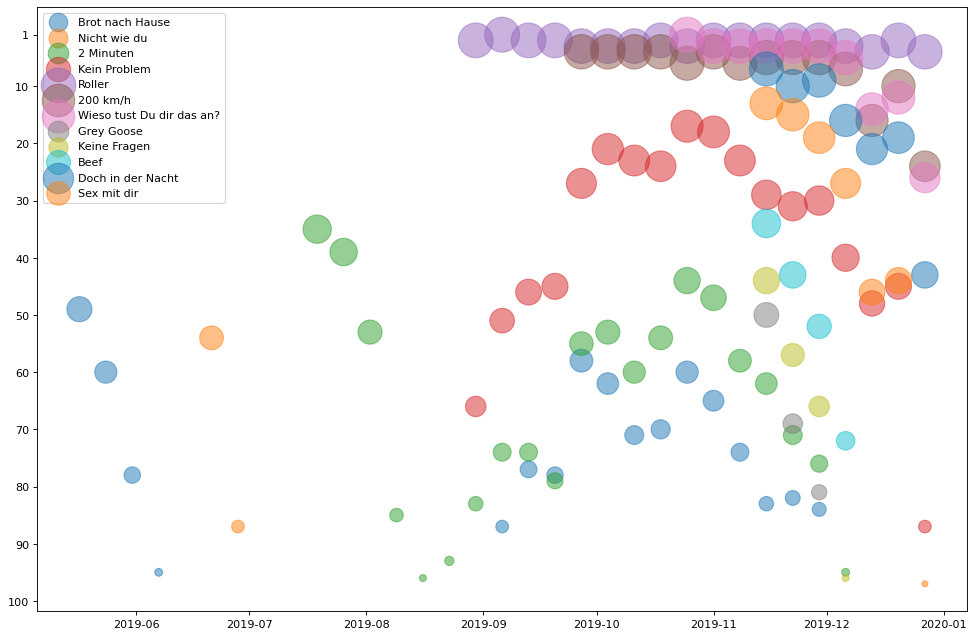

In [52]:
info_artist('Apache 207')

In [112]:
no_ones = charts['peak'] == 1

# number of weeks song was in Top100
weeks_charts = charts[no_ones].groupby(['artist', 'song']).count()[['week']]
weeks_charts.columns = ['weeks_in_charts']

weeks_charts

weeks_in_charts
artist                                             song                                            
Apache 207                                         Roller                                        18
                                                   Wieso tust Du dir das an?                     10
Ava Max                                            Sweet But Psycho                              39
Capital Bra                                        Benzema                                       23
                                                   Cherry Lady                                   22
                                                   Der Bratan bleibt der gleiche                  4
                                                   Prinzessa                                     23
Capital Bra x Samra                                Nummer 1                                      11
                                                   Tilidin                                       27
                                                   Wir ticken                                    13
Capital Bra x Samra & Lea                          110                                           14
Eno feat. MERO                                     Ferrari                                       12
Juju feat. Henning May                             Vermissen                                     34
KC Rebell feat. Summer Cem & Capital Bra           DNA                                           18
Kalazh44, Capital Bra & Samra feat. Nimo & Luciano Royal Rumble                                  10
Lil Nas X                                          Old Town Road                                 39
Loredana feat. Mero                                Kein Plan                                     13
Mariah Carey                                       All I Want For Christmas Is You                7
Mero                                               Hobby Hobby                                   14
                                                   Wolke 10                                      19
Michael Bublé                                      All I Want For Christmas Is You                1
Nimo & Hava                                        Kein Schlaf                                    3
Rammstein                                          Deutschland                                   22
Samra                                              Harami                                        11
Samra & Capital Bra                                Wieder Lila                                   31
Samra x Capital Bra                                Zombie                                        14
Shawn Mendes & Camila Cabello                      Señorita                                      27
Shindy                                             DODI                                          16
Shirin David                                       Gib ihm                                       18
Tones And I                                        Dance Monkey                                  20

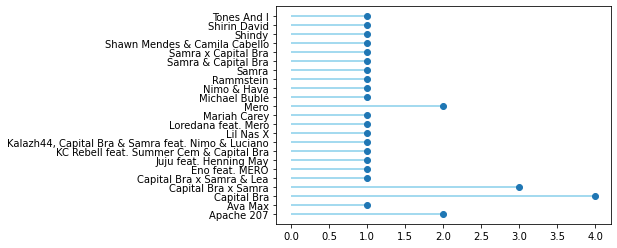

In [100]:
# find artists with most no.1 singles

top_artists = weeks_charts.reset_index().copy()
count = top_artists.groupby(['artist']).count().loc[:, ['count']]

plt.hlines(y=count.index, xmin=0, xmax=count, color='skyblue')
plt.plot(count, count.index, "o")


plt.show()

In [111]:
charts[no_ones].groupby(['artist', 'song']).count()

label  \
artist                                             song                                     
Apache 207                                         Roller                              18   
                                                   Wieso tust Du dir das an?           10   
Ava Max                                            Sweet But Psycho                    39   
Capital Bra                                        Benzema                             23   
                                                   Cherry Lady                         22   
                                                   Der Bratan bleibt der gleiche        4   
                                                   Prinzessa                           23   
Capital Bra x Samra                                Nummer 1                            11   
                                                   Tilidin                             27   
                                                   Wir ticken                          13   
Capital Bra x Samra & Lea                          110                                 14   
Eno feat. MERO                                     Ferrari                             12   
Juju feat. Henning May                             Vermissen                           34   
KC Rebell feat. Summer Cem & Capital Bra           DNA                                 18   
Kalazh44, Capital Bra & Samra feat. Nimo & Luciano Royal Rumble                        10   
Lil Nas X                                          Old Town Road                       39   
Loredana feat. Mero                                Kein Plan                           13   
Mariah Carey                                       All I Want For Christmas Is You      7   
Mero                                               Hobby Hobby                         14   
                                                   Wolke 10                            19   
Michael Bublé                                      All I Want For Christmas Is You      1   
Nimo & Hava                                        Kein Schlaf                          3   
Rammstein                                          Deutschland                         22   
Samra                                              Harami                              11   
Samra & Capital Bra                                Wieder Lila                         31   
Samra x Capital Bra                                Zombie                              14   
Shawn Mendes & Camila Cabello                      Señorita                            27   
Shindy                                             DODI                                16   
Shirin David                                       Gib ihm                             18   
Tones And I                                        Dance Monkey                        20   

                                                                                    position  \
artist                                             song                                        
Apache 207                                         Roller                                 18   
                                                   Wieso tust Du dir das an?              10   
Ava Max                                            Sweet But Psycho                       39   
Capital Bra                                        Benzema                                23   
                                                   Cherry Lady                            22   
                                                   Der Bratan bleibt der gleiche           4   
                                                   Prinzessa                              23   
Capital Bra x Samra                                Nummer 1                               11   
                                                   Tilidin                                27   
                                                   

In [105]:

repl = [' feat. ', ' x ', ' & ', ' , ']

test = charts['artist'].copy()

for r in repl:
    test = test.str.replace(r, '/').astype(str)
#    test = test.str.split('/')
    
test.value_counts()

Apache 207              125
Capital Bra             119
Mero                     93
Shindy                   81
Billie Eilish            79
                       ... 
Robbie Williams           1
Ed Sheeran/Stormzy        1
AriBeatz/Nimo/Lacrim      1
Martin Garrix/Bonn        1
Nimo/Luciano              1
Name: artist, Length: 514, dtype: int64